# Homework 5: Classification (50 points)

Please complete this notebook by filling in the cells provided. Before you begin, execute the following cell to load the needed functions. Each time you start your server, you will need to execute this cell again to load them.  

Homework 5 is due on Friday May 6, 11:59 


In [1]:
# Don't change this cell; just run it. 
import pandas as pd
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

## 1. Intuition on classification (16 points)

#### Question 1.1 (8 points)
You have a large dataset `breast-cancer` which has 11 columns. The first ten are attributes of the person that might be predictive of whether or not someone has breast-cancer, and the 11th column indicates whether they have it or not. 99% of the table contains examples of people who do not have breast cancer. 

Imagine you are trying to use a k-NN classifier to use the first ten columns to predict whether or not someone has breast cancer. You split your training and test set up as necessary, you develop a 7 Nearest Neighbors classifier, and you notice your classifier predicts every point in the test set to be a person who does not have breast cancer. Is there a problem with your code? Explain this phenomenon.   

The problem is not necessarily with the code but instead with the data distribution.  Given that only 1% of the test subjects have breast cancer compared to an overwhelming 99% without cancer, the imbalance in data proportions means that using kNN classifiers will very heavily favor the cancerless result, especially if we split the data into very biased training and test sets.  Thus, the phenomenon is a sampling issue rather than a coding issue, and can be resolved by including more subjects with breast cancer.

#### Question 1.2 (8 points)

You have a training set of 35 examples of characteristics of fruits along with what fruit is actually being described. 25 of the examples of Apples, and 10 of the examples are Oranges. 

You decide to make a k-NN classifier. Give the smallest possible choice for k such that the classifier will predict Apple for every point, regardless of how the data is spread out. Explain how you picked your k. 

Imagine that ties are broken at random for even values of k, so there is no guarantee of what will be picked if there is a tie.

Given that we have 35 total subjects in our sample, a standard k value we could choose would be sqrt(35), which we could round up to 6, and get fairly high accuracy.  However, in the above example, where we want to predict Apple for every answer (regardless of whether or not the point should be an apple), we have to ensure that there are more apples closer to any point than there are oranges.  Given that there are a total of 10 oranges, we would always get apple by counting an extra 11 apples as among the closest datapoints.  Thus, 10+11=k=21 is the smallest possible k that guarantees that the classifier will predict Apple for every point, regardless of how the data is spread out.

## 2. Cars classification (34 points) ##

The data below contains 397 observations on the following 9 variables:
-    mpg: miles per gallon

-    cylinders: number of cylinders between 4 and 8

-    displacement: engine displacement (cu. inches)

-    horsepower: engine horsepower

-    weight: vehicle weight (lbs.)

-    acceleration: time to accelerate from 0 to 60 mph (sec.)

-    year: model year (modulo 100)

-    origin: origin of car (1. American, 2. European, 3. Japanese)




In [2]:
# this commands loads the data into a data frame
auto_df=pd.read_csv("auto.csv")
auto_df.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino
5,15.0,8,429.0,198.0,4341,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220.0,4354,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215.0,4312,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225.0,4425,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190.0,3850,8.5,70,1,amc ambassador dpl


In [3]:
auto_df.shape

(397, 9)

In [5]:
auto_df.year.max()

82

#### Question 2.1 ( Binarization, 3 points)

Create a new column in the data frame containing a binary variable called **mpg_b**: it should be equal to 1 if **mpg** contains a value above its median and equal to 0 if **mpg** contains a value below its median.

In [4]:
# code here and in additional cells if needed
b=[]
for i in range(len(auto_df)):
    if auto_df["mpg"][i]>auto_df["mpg"].median():
        b.append(1)
    else:
        b.append(0)
        
auto_df["mpg_b"] = b

#### Question 2.2 (Numerical and graphical summaries, 7 points)

Explore the data graphically (and numerically if you think it is useful) in order to investigate the association between **mpg_b** and the other features.  Which of the other features seem most likely to be useful in predicting **mpg_b**? Describe your findings.


Text(0.5, 1.0, 'mpg_b vs origin')

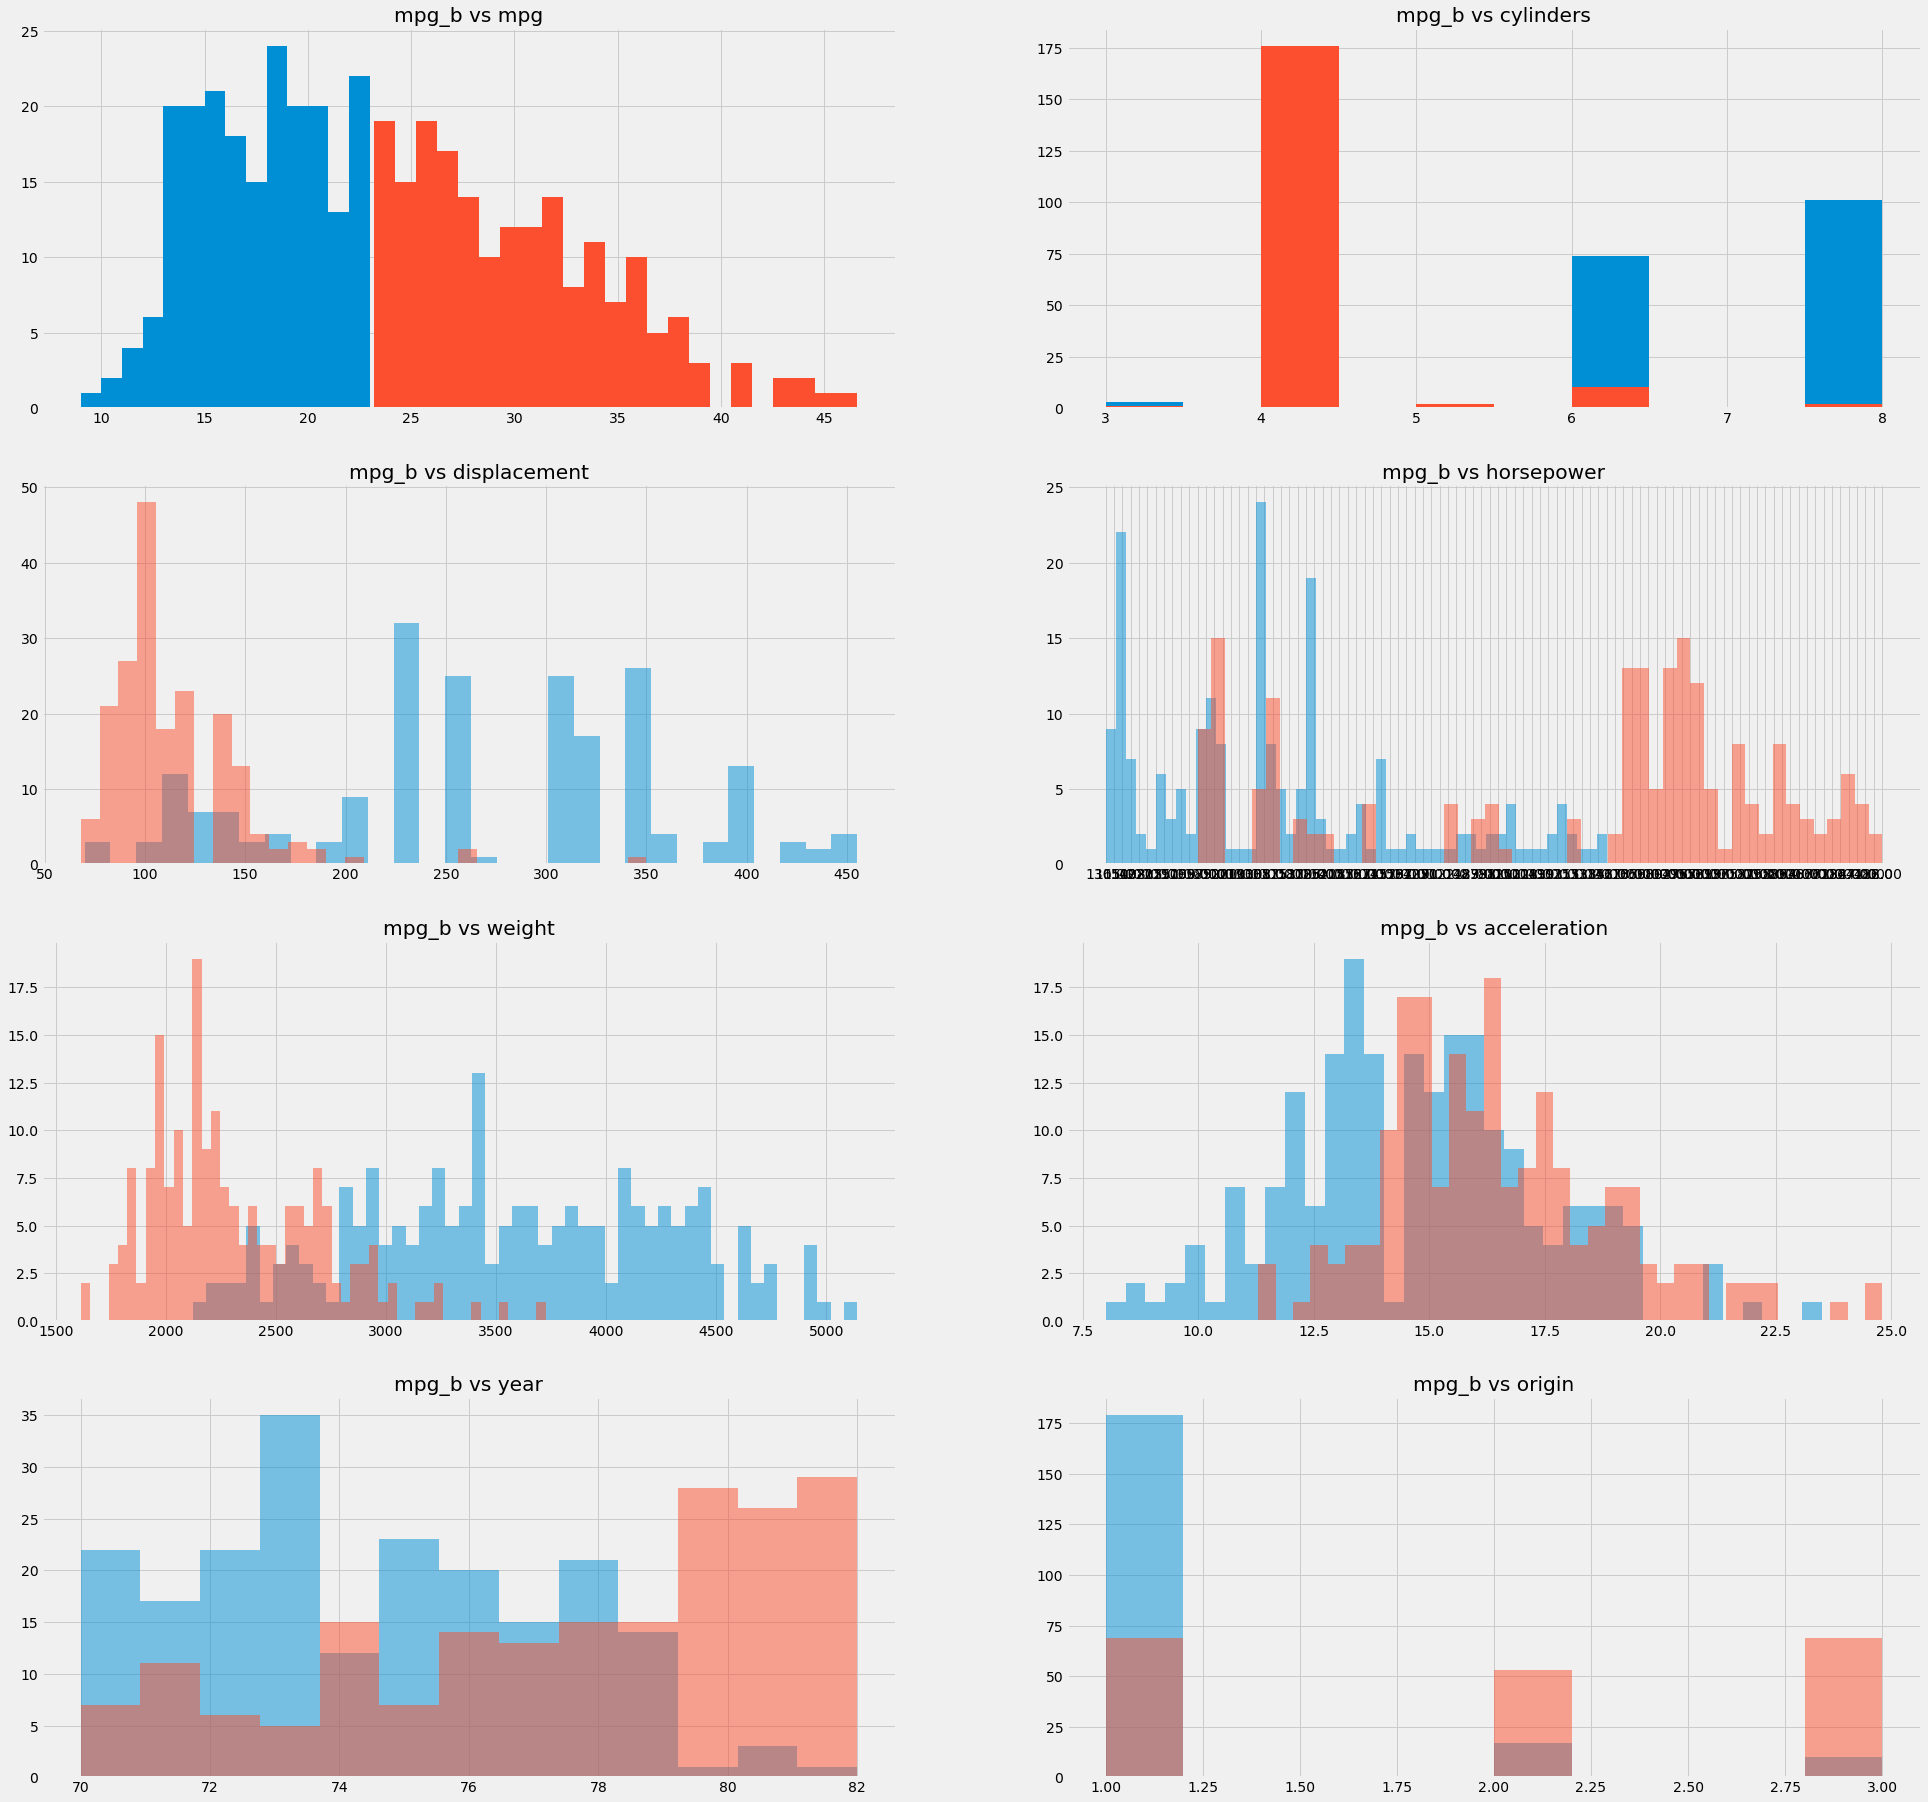

In [5]:
# code here and in additional cells if needed

zero = auto_df[auto_df["mpg_b"]==0]
one = auto_df[auto_df["mpg_b"]==1]

from matplotlib.pyplot import figure
fig, axs = plt.subplots(4,2,figsize=(30,30))

axs[0,0].hist(zero.mpg, bins=14)
axs[0,0].hist(one.mpg, bins=23)
axs[0,0].set_title("mpg_b vs mpg")

axs[0,1].hist(zero.cylinders)
axs[0,1].hist(one.cylinders)
axs[0,1].set_title("mpg_b vs cylinders")

axs[1,0].hist(zero.displacement, alpha=0.5, bins=30)
axs[1,0].hist(one.displacement, alpha=0.5, bins=30)
axs[1,0].set_title("mpg_b vs displacement")

axs[1,1].hist(zero.horsepower, alpha=0.5, bins=50)
axs[1,1].hist(one.horsepower, alpha=0.5, bins=50)
axs[1,1].set_title("mpg_b vs horsepower")

axs[2,0].hist(zero.weight, bins=50, alpha=0.5)
axs[2,0].hist(one.weight, bins=50, alpha=0.5)
axs[2,0].set_title("mpg_b vs weight")

axs[2,1].hist(zero.acceleration, alpha=0.5, bins=36)
axs[2,1].hist(one.acceleration, alpha=0.5, bins=36)
axs[2,1].set_title("mpg_b vs acceleration")

axs[3,0].hist(zero.year, bins=13, alpha=0.5)
axs[3,0].hist(one.year, bins=13, alpha=0.5)
axs[3,0].set_title("mpg_b vs year")

axs[3,1].hist(zero.origin, alpha=0.5)
axs[3,1].hist(one.origin, alpha=0.5)
axs[3,1].set_title("mpg_b vs origin")

In [57]:
print("I believe that the best features for predicting mpg_b would be where certain values of those features only occur when mpg_b = 0 and where other features only occur when mpg_b = 1")
print("This is best illustrated by graphs with little to no overlay between the histograms representing data where mpg_b=0 and data where mpg_b=1")
print("Thus, I believe that the best features for predicting mpg_b may be displacement and weight.")

I believe that the best features for predicting mpg_b would be where certain values of those features only occur when mpg_b = 0 and where other features only occur when mpg_b = 1
This is best illustrated by graphs with little to no overlay between the histograms representing data where mpg_b=0 and data where mpg_b=1
Thus, I believe that the best features for predicting mpg_b may be displacement and weight.


*Write your answer here, replacing this text.*

#### Question 2.3 (Split the data, 3 points)

Split the data into a training set and a test set. Select **randomly** 50 rows of your data frame and extract their data into a test data frame. The rest of the 347 rows should form your training data frame.

In [6]:
# code here and in additional cells if needed
test = auto_df.sample(50).reset_index()

value=[]
for i in range(len(test)):
    value.append(test["index"])

In [7]:
training = auto_df.drop(value[0])

training

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,mpg_b
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu,0
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320,0
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino,0
5,15.0,8,429.0,198.0,4341,10.0,70,1,ford galaxie 500,0
6,14.0,8,454.0,220.0,4354,9.0,70,1,chevrolet impala,0
...,...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86.00,2790,15.6,82,1,ford mustang gl,1
393,44.0,4,97.0,52.00,2130,24.6,82,2,vw pickup,1
394,32.0,4,135.0,84.00,2295,11.6,82,1,dodge rampage,1
395,28.0,4,120.0,79.00,2625,18.6,82,1,ford ranger,1


#### Question 2.4 (kNN for mpg_b, 10 points)

The goal here is to construct a kNN algorithm that has high **accuracy** (proportion of test examples labeled correctly). Recall that you have to take into consideration: (i) the type of features (categorical, quantitative); (ii) the scaling of the features; (iii) the distance you use; (iv) the features in the model; (v) the number of neighbors, k.

You can choose to use only the variables that seem most asociated with **mpg_b** in Q2.2. Try several values of k, and report on your test errors. Which value of k performs best?

**Note:** You need to write the code for the algorithm and not use kNN functions in Python libraries. You may use any of the functions we wrote in the lecture notebooks.


In [8]:
#standard units
def standard_units(x):
    "Convert any array of numbers to standard units."
    return (x - np.average(x))/np.std(x,ddof=1)

xtrain=pd.DataFrame(
        {"Disp": standard_units(training.displacement),
         "Weight": standard_units(training.weight)})

ytrain = training["mpg_b"]

xtest=pd.DataFrame(
        {"Disp": standard_units(test.displacement),
         "Weight": standard_units(test.weight)})

ytest = test["mpg_b"]

xtrain.head()

,Disp,Weight
0,1.109418,0.662464
1,1.520336,0.886592
4,1.061637,0.597241
5,2.275278,1.655032
6,2.514184,1.670448


In [9]:
import random

def distance(pt1, pt2):
    return np.sqrt(sum((pt1 - pt2)**2))

def all_distances(training, point):
    attributes = training[["Disp","Weight"]]
    def distance_from_point(row):
        return distance(point, np.array(row))
    return attributes.apply(distance_from_point,axis=1)

def closest(X_train, Y_train, point, k):
    """A df containing the k closest rows in the training df to 
    array 'point' """
    attributes=X_train.copy()
    attributes['Distance']=all_distances(attributes, point)
    attributes['Class']=Y_train
    attributes=attributes.sort_values('Distance')    
    topk = attributes.head(k)
    return topk

def majority(topkclasses):
    """1 if the majority of the "Class" column is 1's, and 0 otherwise."""
    ones = topkclasses[topkclasses.Class==1].shape[0]
    zeros = topkclasses[topkclasses.Class==0].shape[0]
    if ones > zeros:
        return 1
    if zeros > ones:
        return 0
    if zeros == ones:
        talk = random.randint(0, 1)
        if talk == 0:
            return 0
        if talk == 1:
            return 1

In [10]:
def classify(X_train,Y_train, X_test, k):
    #training = X_train
    n=X_test.shape[0] # the number of test cases
    
    pred_class = np.array([])
    for i in np.arange(n):
        topkclasses = closest(X_train,Y_train, X_test.iloc[i], k)
        pred_class = np.append(pred_class,majority(topkclasses))
    
    report_df=X_test.copy()
    report_df['Class']=pred_class
    
    return report_df

In [11]:
res_df=classify(xtrain,ytrain, xtest, 5)

In [12]:
res_df.head(10)

,Disp,Weight,Class
0,1.851224,2.134891,0.0
1,0.130207,-0.025380,0.0
2,-0.479524,0.307412,1.0
3,0.130207,0.330443,0.0
4,-0.705715,-0.314414,1.0
5,-1.118759,-1.160788,1.0
6,0.376067,-0.140533,0.0
7,-1.128593,-1.241396,1.0
8,1.359505,1.791735,0.0
9,-1.295778,-0.487143,1.0


In [13]:
np.mean(ytest==res_df.Class)

0.82

In [14]:
trial1=classify(xtrain,ytrain, xtest, 4)
np.mean(ytest==trial1.Class)

0.82

In [15]:
trial2=classify(xtrain,ytrain, xtest, 8)
np.mean(ytest==trial1.Class)

0.82

In [16]:
trial3=classify(xtrain,ytrain, xtest, 13)
np.mean(ytest==trial3.Class)

0.84

In [17]:
trial4=classify(xtrain,ytrain, xtest, 10)
np.mean(ytest==trial4.Class)

0.84

In [20]:
k=list(range(3,25))
for i in k:
    print(np.mean(ytest==classify(xtrain,ytrain, xtest, i).Class))

0.82
0.84
0.82
0.8
0.84
0.82
0.84
0.84
0.84
0.84
0.84
0.84
0.84
0.84
0.82
0.8
0.8
0.8
0.82
0.82
0.8
0.82


In [19]:
len(auto_df)

397

In [23]:
print("By what we see above, the best values of k for getting the most accurate prediction are k=4, 7, 9, 10, 11, 12, 13, 14, 15, 16")
print("I am interested by the fact that many of the k values where we get the most accuracy are very close to each other, which may mean that our ideal k is between 9 and 16")

By what we see above, the best values of k for getting the most accurate prediction are k=4, 7, 9, 10, 11, 12, 13, 14, 15, 16
I am interested by the fact that many of the k values where we get the most accuracy are very close to each other, which may mean that our ideal k is between 9 and 16


*Write your answer here, replacing this text.*

#### Question 2.5 (kNN for country of origin, 14 points)

The goal here is to construct a kNN algorithm for classfication of country of origin. Instructions are similar to those in Q2.4 - the main difference is that `origin` has 3 labels so you need to modify your code to account for that. This is an example of **multiclass classification**.

Issues to consider:
- as before, you need training and testing data
- try several values of k 
- feature selection, scaling, distance are important
- are the three groups balanced?
- how do you break ties?

**Hints (on tie breaking)**: (i) random selection between tied labels; (ii) use the distances when tied (closer neighbors are more relevant).

In [25]:
# code here and in additional cells if needed
auto_df.origin.value_counts()

1    248
3     79
2     70
Name: origin, dtype: int64

Text(0.5, 1.0, 'origin vs origin')

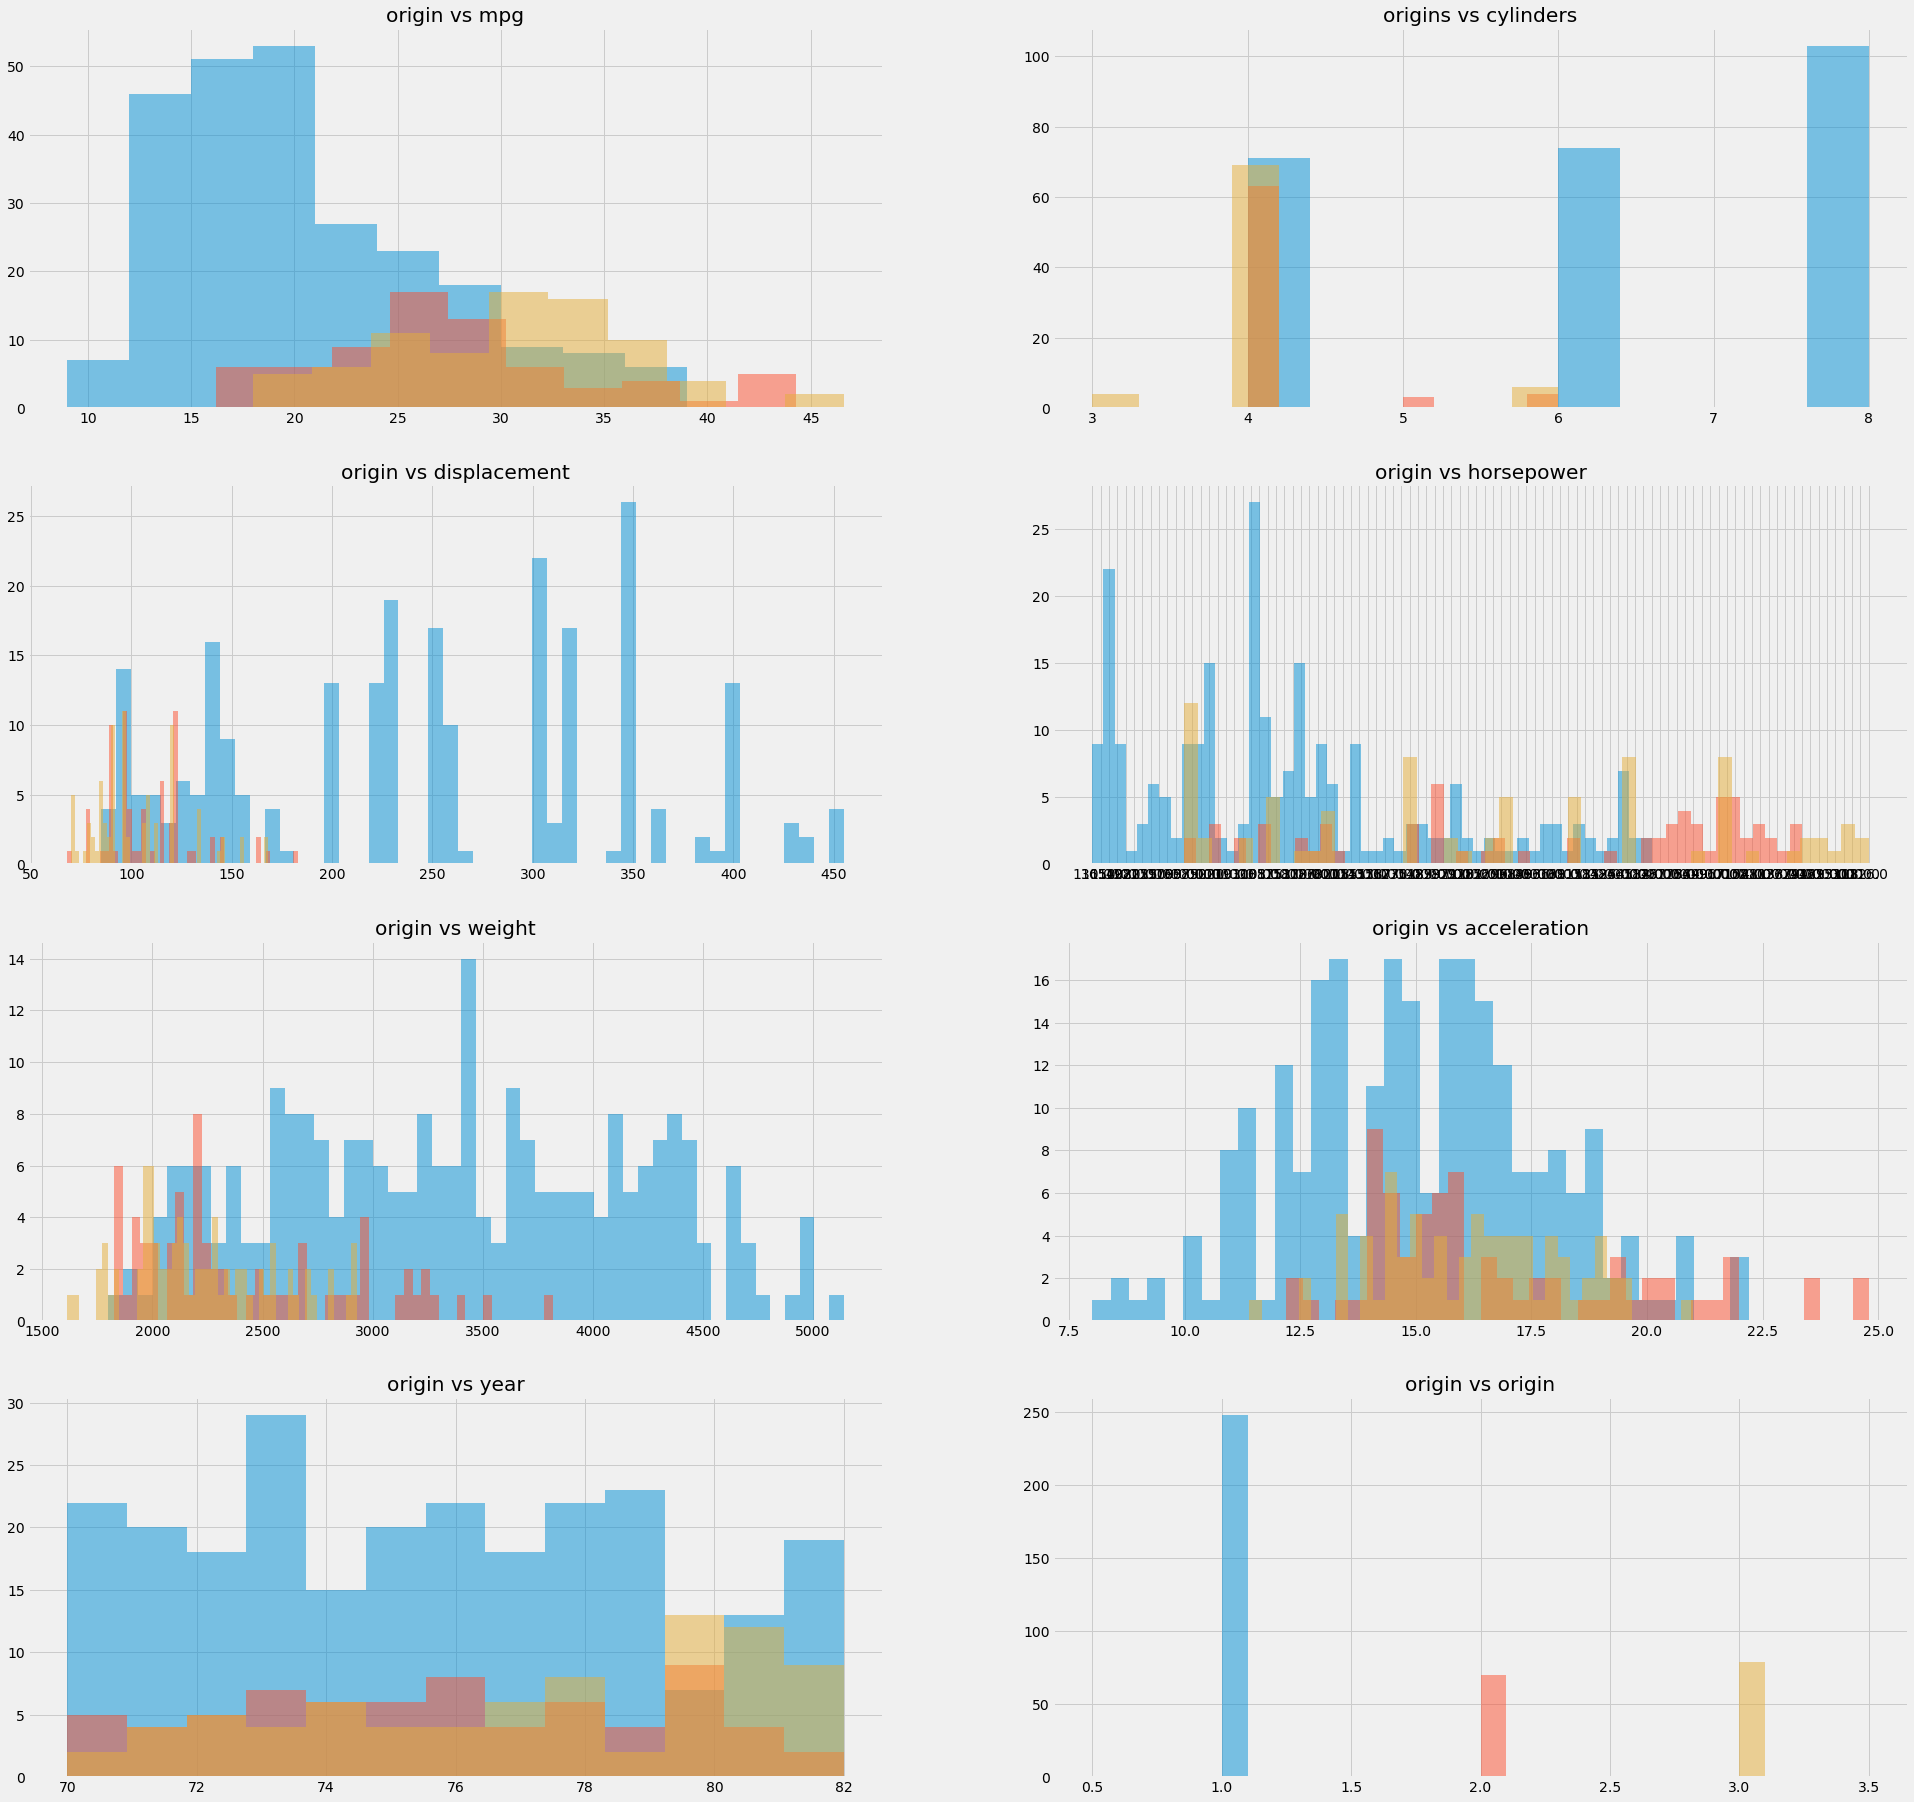

In [49]:
from matplotlib.pyplot import figure
fig, axs = plt.subplots(4,2,figsize=(30,30))

axs[0,0].hist(uno.mpg, alpha=0.5)
axs[0,0].hist(dos.mpg, alpha=0.5)
axs[0,0].hist(tres.mpg, alpha=0.5)
axs[0,0].set_title("origin vs mpg")

axs[0,1].hist(uno.cylinders, alpha=0.5)
axs[0,1].hist(dos.cylinders, alpha=0.5)
axs[0,1].hist(tres.cylinders, alpha=0.5)
axs[0,1].set_title("origins vs cylinders")

axs[1,0].hist(uno.displacement, alpha=0.5, bins=50)
axs[1,0].hist(dos.displacement, alpha=0.5, bins=50)
axs[1,0].hist(tres.displacement, alpha=0.5, bins=50)
axs[1,0].set_title("origin vs displacement")

axs[1,1].hist(uno.horsepower, alpha=0.5, bins=50)
axs[1,1].hist(dos.horsepower, alpha=0.5, bins=50)
axs[1,1].hist(tres.horsepower, alpha=0.5, bins=50)
axs[1,1].set_title("origin vs horsepower")

axs[2,0].hist(uno.weight, bins=50, alpha=0.5)
axs[2,0].hist(dos.weight, bins=50, alpha=0.5)
axs[2,0].hist(tres.weight, bins=50, alpha=0.5)
axs[2,0].set_title("origin vs weight")

axs[2,1].hist(uno.acceleration, alpha=0.5, bins=36)
axs[2,1].hist(dos.acceleration, alpha=0.5, bins=36)
axs[2,1].hist(tres.acceleration, alpha=0.5, bins=36)
axs[2,1].set_title("origin vs acceleration")

axs[3,0].hist(uno.year, bins=13, alpha=0.5)
axs[3,0].hist(dos.year, bins=13, alpha=0.5)
axs[3,0].hist(tres.year, bins=13, alpha=0.5)
axs[3,0].set_title("origin vs year")

axs[3,1].hist(uno.origin, alpha=0.5)
axs[3,1].hist(dos.origin, alpha=0.5)
axs[3,1].hist(tres.origin, alpha=0.5)
axs[3,1].set_title("origin vs origin")

In [44]:
uno = auto_df[auto_df["origin"]==1]
dos = auto_df[auto_df["origin"]==2]
tres = auto_df[auto_df["origin"]==3]

In [50]:
print("As we did with 2.4, we want to select features where is the least intersection of histograms for each origin value.  For this problem, let us once again select weight and displacement as the test features")

As we did with 2.4, we want to select features where is the least intersection of histograms for each origin value.  For this problem, let us once again select weight and displacement as the test features


In [27]:
def standard_units(x):
    "Convert any array of numbers to standard units."
    return (x - np.average(x))/np.std(x,ddof=1)

xtrain=pd.DataFrame(
        {"Disp": standard_units(training.displacement),
         "Weight": standard_units(training.weight)})

ytrain = training["origin"]

xtest=pd.DataFrame(
        {"Disp": standard_units(test.displacement),
         "Weight": standard_units(test.weight)})

ytest = test["origin"]

xtrain.head()

,Disp,Weight
0,1.109418,0.662464
1,1.520336,0.886592
4,1.061637,0.597241
5,2.275278,1.655032
6,2.514184,1.670448


In [28]:
def distance(pt1, pt2):
    return np.sqrt(sum((pt1 - pt2)**2))

def all_distances(training, point):
    attributes = training[["Disp","Weight"]]
    def distance_from_point(row):
        return distance(point, np.array(row))
    return attributes.apply(distance_from_point,axis=1)

def closest(X_train, Y_train, point, k):
    """A df containing the k closest rows in the training df to 
    array 'point' """
    attributes=X_train.copy()
    attributes['Distance']=all_distances(attributes, point)
    attributes['Class']=Y_train
    attributes=attributes.sort_values('Distance')    
    topk = attributes.head(k)
    return topk

*Write your answer here, replacing this text.*

In [29]:
import random

def majority(topkclasses):
    ones = topkclasses[topkclasses.Class==1].shape[0]
    twos = topkclasses[topkclasses.Class==2].shape[0]
    threes = topkclasses[topkclasses.Class==3].shape[0]
    if (ones > twos) & (ones > threes):
        return 1
    if (twos > ones) & (twos > threes):
        return 2
    if (threes > ones) & (threes > twos):
        return 3
    if (ones > threes) & (ones == twos):
        if random.randint(0, 1) == 0:
            return 1
        else:
            return 2
    if (ones > twos) & (ones == threes):
        if random.randint(0, 1) == 0:
            return 1
        else:
            return 3
    if (twos > ones) & (threes == twos):
        if random.randint(0, 1) == 0:
            return 2
        else:
            return 3
    if (ones == twos == threes):
        dunk = random.randint(0, 2)
        if dunk == 0:
            return 1
        if dunk == 1:
            return 2
        if dunk == 2:
            return 3
    else:
        print(ones,twos,threes)

In [34]:
def classify(X_train,Y_train, X_test, k):
    #training = X_train
    n=X_test.shape[0] # the number of test cases
    
    pred_class = np.array([])
    for i in np.arange(n):
        topkclasses = closest(X_train,Y_train, X_test.iloc[i], k)
        pred_class = np.append(pred_class,majority(topkclasses))
    
    report_df=X_test.copy()
    report_df['Class']=pred_class
    
    return report_df

In [31]:
res_df=classify(xtrain,ytrain, xtest, 5)

In [32]:
res_df.head(10)

,Disp,Weight,Class
0,1.851224,2.134891,1.0
1,0.130207,-0.025380,1.0
2,-0.479524,0.307412,2.0
3,0.130207,0.330443,1.0
4,-0.705715,-0.314414,1.0
5,-1.118759,-1.160788,3.0
6,0.376067,-0.140533,1.0
7,-1.128593,-1.241396,2.0
8,1.359505,1.791735,1.0
9,-1.295778,-0.487143,3.0


In [33]:
def classify(X_train,Y_train, X_test, k):
    #training = X_train
    n=X_test.shape[0] # the number of test cases
    
    pred_class = np.array([])
    for i in np.arange(n):
        topkclasses = closest(X_train,Y_train, X_test.iloc[i], k)
        pred_class = np.append(pred_class,majority(topkclasses))
    
    report_df=X_test.copy()
    report_df['Class']=pred_class
    
    return report_df

In [35]:
res_df=classify(xtrain,ytrain, xtest, 5)

In [36]:
res_df

,Disp,Weight,Class
0,1.851224,2.134891,1.0
1,0.130207,-0.025380,1.0
2,-0.479524,0.307412,2.0
3,0.130207,0.330443,1.0
4,-0.705715,-0.314414,1.0
5,-1.118759,-1.160788,3.0
6,0.376067,-0.140533,1.0
7,-1.128593,-1.241396,2.0
8,1.359505,1.791735,1.0
9,-1.295778,-0.487143,2.0


In [37]:
np.mean(ytest==res_df.Class)

0.76

In [38]:
trial4=classify(xtrain,ytrain, xtest, 10)
np.mean(ytest==trial4.Class)

0.78

In [41]:
print("The 3 groups are not balanced, because there is far more of origin 1 than there is of origin 2 or 3 (which are quite close in terms of quantity)")
print("As opposed to 2.4, we find that there is only one k value that gets us the best accuracy (k=5).  Furthermore, given that the accuracy is lower than it was for 2.4, this indicates that weight and displacement may not be the optimal factors to use to predict origin")

The 3 groups are not balanced, because there is far more of origin 1 than there is of origin 2 or 3 (which are quite close in terms of quantity)
As opposed to 2.4, we find that there is only one k value that gets us the best accuracy (k=5).  Furthermore, given that the accuracy is lower than it was for 2.4, this indicates that weight and displacement may not be the optimal factors to use to predict origin


In [39]:
k=list(range(3,25))
for i in k:
    print(np.mean(ytest==classify(xtrain,ytrain, xtest, i).Class))

0.74
0.76
0.8
0.78
0.74
0.72
0.76
0.78
0.78
0.76
0.78
0.74
0.76
0.76
0.78
0.78
0.78
0.76
0.76
0.78
0.76
0.76
